# Necessary Comment : jupyter notebook

## Necessary Lighbary



In [1]:
import sqlite3
import pandas as pd
import talib
import mplfinance as mpf
import numpy as np

## Database Connection

In [5]:
# connection = sqlite3.connect(r"cripto.db")
connection = sqlite3.connect(r"big_data.db")
cur = connection.cursor()
database_data = cur.execute("select * from asset order by CloseTime").fetchall()

## Dataframe

In [6]:
df = pd.DataFrame(database_data)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1543657,BTCBUSD,19998.23,20002.69,19995.19,19998.21,9.474930,-0.000100008850785477,1.661659e+12,189483.099107,441.0,6.187260,1661658480
1,1543281,BTCBUSD,19997.02,19998.00,19997.00,19997.00,2.829590,-0.000100014902222614,1.661636e+12,56583.426669,173.0,0.973320,1661635920
2,215362,BTCBUSD,9997.97,9998.65,9997.96,9997.96,0.219472,-0.00010002030412392,1.581828e+12,2194.416861,5.0,0.000000,1581828360
3,215635,BTCBUSD,9995.59,9995.60,9995.58,9995.58,0.329002,-0.000100044119458864,1.581845e+12,3288.567211,4.0,0.000000,1581844740
4,1544689,BTCBUSD,19987.76,19998.62,19985.14,19987.74,25.911260,-0.000100061237461319,1.661720e+12,518027.903052,642.0,17.762630,1661720400
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1706333,1396320,BTCBUSD,30036.82,30036.85,30026.53,30036.85,1.743990,9.98774171128497e-05,1.652818e+12,52377.270472,94.0,0.921370,1652818260
1706334,215640,BTCBUSD,10007.99,10008.00,10007.99,10008.00,0.020623,9.99201637913135e-05,1.581845e+12,206.394904,3.0,0.020623,1581845040
1706335,215639,BTCBUSD,10005.99,10006.00,10005.99,10006.00,0.008695,9.99401358608021e-05,1.581845e+12,87.002120,2.0,0.008695,1581844980
1706336,1271101,BTCBUSD,40020.02,40023.65,40020.02,40020.06,4.136800,9.99499750396754e-05,1.645305e+12,165568.528356,92.0,1.654020,1645305120


## Name Columns

In [7]:
df.columns = ['Id', 'Symbol', 'Open', 'High', 'Low', 'Close', 'VolumeBTC', 'Change', 'CloseTime','VolumeBUSD', 'Trades', 'BuyQuoteVolume', 'Time']
# df = df.iloc[:, 2:12]
df


,Id,Symbol,Open,High,Low,Close,VolumeBTC,Change,CloseTime,VolumeBUSD,Trades,BuyQuoteVolume,Time
0,1543657,BTCBUSD,19998.23,20002.69,19995.19,19998.21,9.474930,-0.000100008850785477,1.661659e+12,189483.099107,441.0,6.187260,1661658480
1,1543281,BTCBUSD,19997.02,19998.00,19997.00,19997.00,2.829590,-0.000100014902222614,1.661636e+12,56583.426669,173.0,0.973320,1661635920
2,215362,BTCBUSD,9997.97,9998.65,9997.96,9997.96,0.219472,-0.00010002030412392,1.581828e+12,2194.416861,5.0,0.000000,1581828360
3,215635,BTCBUSD,9995.59,9995.60,9995.58,9995.58,0.329002,-0.000100044119458864,1.581845e+12,3288.567211,4.0,0.000000,1581844740
4,1544689,BTCBUSD,19987.76,19998.62,19985.14,19987.74,25.911260,-0.000100061237461319,1.661720e+12,518027.903052,642.0,17.762630,1661720400
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1706333,1396320,BTCBUSD,30036.82,30036.85,30026.53,30036.85,1.743990,9.98774171128497e-05,1.652818e+12,52377.270472,94.0,0.921370,1652818260
1706334,215640,BTCBUSD,10007.99,10008.00,10007.99,10008.00,0.020623,9.99201637913135e-05,1.581845e+12,206.394904,3.0,0.020623,1581845040
1706335,215639,BTCBUSD,10005.99,10006.00,10005.99,10006.00,0.008695,9.99401358608021e-05,1.581845e+12,87.002120,2.0,0.008695,1581844980
1706336,1271101,BTCBUSD,40020.02,40023.65,40020.02,40020.06,4.136800,9.99499750396754e-05,1.645305e+12,165568.528356,92.0,1.654020,1645305120


# Make a Candle plot

In [8]:
# """
# Candle Data Column
# """
# df_candle = df[['CloseTime', 'Open', 'High', 'Low', 'Close', 'VolumeBTC']]

# """
# Time Indexing
# """
# df_candle = df.set_index('CloseTime')
# df_candle.index = pd.to_datetime(df.index, unit='ms')

# mpf.plot(
#     df_candle.tail(100),
# #     df,
#     mav=[7, 25 , 90],
#     type="candle",
# #     type="renko",
#     title=f"BTC BUSD Price Candle",
#     style="yahoo",
# )

In [9]:
df = df.set_index('CloseTime')
df.index = pd.to_datetime(df.index, unit='ms')
# df = df.tail(100)
df

,Id,Symbol,Open,High,Low,Close,VolumeBTC,Change,VolumeBUSD,Trades,BuyQuoteVolume,Time
CloseTime,,,,,,,,,,,,
2022-08-28 03:48:59.999000064,1543657,BTCBUSD,19998.23,20002.69,19995.19,19998.21,9.474930,-0.000100008850785477,189483.099107,441.0,6.187260,1661658480
2022-08-27 21:32:59.999000064,1543281,BTCBUSD,19997.02,19998.00,19997.00,19997.00,2.829590,-0.000100014902222614,56583.426669,173.0,0.973320,1661635920
2020-02-16 04:46:59.999000064,215362,BTCBUSD,9997.97,9998.65,9997.96,9997.96,0.219472,-0.00010002030412392,2194.416861,5.0,0.000000,1581828360
2020-02-16 09:19:59.999000064,215635,BTCBUSD,9995.59,9995.60,9995.58,9995.58,0.329002,-0.000100044119458864,3288.567211,4.0,0.000000,1581844740
2022-08-28 21:00:59.999000064,1544689,BTCBUSD,19987.76,19998.62,19985.14,19987.74,25.911260,-0.000100061237461319,518027.903052,642.0,17.762630,1661720400
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-17 20:11:59.999000064,1396320,BTCBUSD,30036.82,30036.85,30026.53,30036.85,1.743990,9.98774171128497e-05,52377.270472,94.0,0.921370,1652818260
2020-02-16 09:24:59.999000064,215640,BTCBUSD,10007.99,10008.00,10007.99,10008.00,0.020623,9.99201637913135e-05,206.394904,3.0,0.020623,1581845040
2020-02-16 09:23:59.999000064,215639,BTCBUSD,10005.99,10006.00,10005.99,10006.00,0.008695,9.99401358608021e-05,87.002120,2.0,0.008695,1581844980


# Make a Custom Pattern

In [10]:
# # TODO: ALL all 100 and -100 to the X asis
# # Find Candle Pattern
# ENGULFING = talib.CDLENGULFING(df['Open'], df['High'], df['Low'],
#                                          df['Close'])
# # ENGULFING
# ENGULFING[ENGULFING != 0]

# bullish_engulfing = (ENGULFING.replace([-100, 0], np.nan)/100) *(df.Low-2)
# bearsh_engulfing = (-ENGULFING.replace([100, 0], np.nan)/100) *(df.High *1.0001)

# addplot = [mpf.make_addplot(bullish_engulfing, type='scatter', color='g', marker = "^"), mpf.make_addplot(bearsh_engulfing, type='scatter', color='r', marker = "v")]
# mpf.plot(df, addplot = addplot,title=f"Engulfing Signal", type="candle",style="yahoo")

In [11]:
# dir(talib)

In [12]:
"""
means you are dropping duplicket column.
https://stackoverflow.com/questions/35084071/concat-dataframe-reindexing-only-valid-with-uniquely-valued-index-objects

"""
# df = df.head(100)
df = df.reset_index(drop=True)
df

,Id,Symbol,Open,High,Low,Close,VolumeBTC,Change,VolumeBUSD,Trades,BuyQuoteVolume,Time
0,1543657,BTCBUSD,19998.23,20002.69,19995.19,19998.21,9.474930,-0.000100008850785477,189483.099107,441.0,6.187260,1661658480
1,1543281,BTCBUSD,19997.02,19998.00,19997.00,19997.00,2.829590,-0.000100014902222614,56583.426669,173.0,0.973320,1661635920
2,215362,BTCBUSD,9997.97,9998.65,9997.96,9997.96,0.219472,-0.00010002030412392,2194.416861,5.0,0.000000,1581828360
3,215635,BTCBUSD,9995.59,9995.60,9995.58,9995.58,0.329002,-0.000100044119458864,3288.567211,4.0,0.000000,1581844740
4,1544689,BTCBUSD,19987.76,19998.62,19985.14,19987.74,25.911260,-0.000100061237461319,518027.903052,642.0,17.762630,1661720400
...,...,...,...,...,...,...,...,...,...,...,...,...
1706333,1396320,BTCBUSD,30036.82,30036.85,30026.53,30036.85,1.743990,9.98774171128497e-05,52377.270472,94.0,0.921370,1652818260
1706334,215640,BTCBUSD,10007.99,10008.00,10007.99,10008.00,0.020623,9.99201637913135e-05,206.394904,3.0,0.020623,1581845040
1706335,215639,BTCBUSD,10005.99,10006.00,10005.99,10006.00,0.008695,9.99401358608021e-05,87.002120,2.0,0.008695,1581844980
1706336,1271101,BTCBUSD,40020.02,40023.65,40020.02,40020.06,4.136800,9.99499750396754e-05,165568.528356,92.0,1.654020,1645305120


# Make Dataframe From Binance Data

In [13]:
# from dataframe import GetDataframe
# df = GetDataframe().data_function('BTCBUSD', 1, 100)
# df

## Get Result and All the candlesticks from Ta-Lib

In [14]:
results = []
cols = []
for attr in dir(talib):
    if attr[:3]=='CDL':
#         print(getattr(talib, attr))
        res = getattr(talib, attr)(df['Open'], df['High'], df['Low'],
                                         df['Close'])
        results.append(res)
        cols.append(attr)
print(results)
print(cols)

[0          0
1          0
2          0
3          0
4          0
          ..
1706333    0
1706334    0
1706335    0
1706336    0
1706337    0
Length: 1706338, dtype: int32, 0          0
1          0
2          0
3          0
4          0
          ..
1706333    0
1706334    0
1706335    0
1706336    0
1706337    0
Length: 1706338, dtype: int32, 0          0
1          0
2          0
3          0
4          0
          ..
1706333    0
1706334    0
1706335    0
1706336    0
1706337    0
Length: 1706338, dtype: int32, 0          0
1          0
2          0
3          0
4          0
          ..
1706333    0
1706334    0
1706335    0
1706336    0
1706337    0
Length: 1706338, dtype: int32, 0          0
1          0
2          0
3          0
4          0
          ..
1706333    0
1706334    0
1706335    0
1706336    0
1706337    0
Length: 1706338, dtype: int32, 0          0
1          0
2          0
3          0
4          0
          ..
1706333    0
1706334    0
1706335    0
1706336    0

## Frame all candle and add sum of the candle result

In [15]:
patterns = pd.DataFrame(results).T
patterns.columns = cols
patterns.astype(float)
patterns["Sum"] = patterns.sum(axis=1)
patterns

,CDL2CROWS,CDL3BLACKCROWS,CDL3INSIDE,CDL3LINESTRIKE,CDL3OUTSIDE,CDL3STARSINSOUTH,CDL3WHITESOLDIERS,CDLABANDONEDBABY,CDLADVANCEBLOCK,CDLBELTHOLD,...,CDLSTALLEDPATTERN,CDLSTICKSANDWICH,CDLTAKURI,CDLTASUKIGAP,CDLTHRUSTING,CDLTRISTAR,CDLUNIQUE3RIVER,CDLUPSIDEGAP2CROWS,CDLXSIDEGAP3METHODS,Sum
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1706333,0,0,0,0,0,0,0,0,0,0,...,0,0,100,0,0,-100,0,0,0,400
1706334,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,200
1706335,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,200
1706336,0,0,0,0,0,0,0,0,0,100,...,0,0,0,0,0,100,0,0,0,500


## Saferate Numeracdata from dataframe

In [16]:
df = df.drop(['Symbol', 'Id', 'Time'], axis=1)

In [17]:
# df = df.iloc[:,0:10]
# x

## Combine two Dataframe

In [18]:
df = df.astype(float)


In [19]:
df = df.add(patterns, fill_value=0)
df

,BuyQuoteVolume,CDL2CROWS,CDL3BLACKCROWS,CDL3INSIDE,CDL3LINESTRIKE,CDL3OUTSIDE,CDL3STARSINSOUTH,CDL3WHITESOLDIERS,CDLABANDONEDBABY,CDLADVANCEBLOCK,...,CDLXSIDEGAP3METHODS,Change,Close,High,Low,Open,Sum,Trades,VolumeBTC,VolumeBUSD
0,6.187260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.0001,19998.21,20002.69,19995.19,19998.23,0.0,441.0,9.474930,189483.099107
1,0.973320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.0001,19997.00,19998.00,19997.00,19997.02,0.0,173.0,2.829590,56583.426669
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.0001,9997.96,9998.65,9997.96,9997.97,0.0,5.0,0.219472,2194.416861
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.0001,9995.58,9995.60,9995.58,9995.59,0.0,4.0,0.329002,3288.567211
4,17.762630,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.0001,19987.74,19998.62,19985.14,19987.76,0.0,642.0,25.911260,518027.903052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1706333,0.921370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0001,30036.85,30036.85,30026.53,30036.82,400.0,94.0,1.743990,52377.270472
1706334,0.020623,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0001,10008.00,10008.00,10007.99,10007.99,200.0,3.0,0.020623,206.394904
1706335,0.008695,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0001,10006.00,10006.00,10005.99,10005.99,200.0,2.0,0.008695,87.002120
1706336,1.654020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0001,40020.06,40023.65,40020.02,40020.02,500.0,92.0,4.136800,165568.528356


## Make a plot to see the sum

0             0
1             0
2             0
3             0
4             0
           ... 
1706333     800
1706334     400
1706335     400
1706336    1000
1706337     200
Length: 1706338, dtype: int64


<AxesSubplot: >

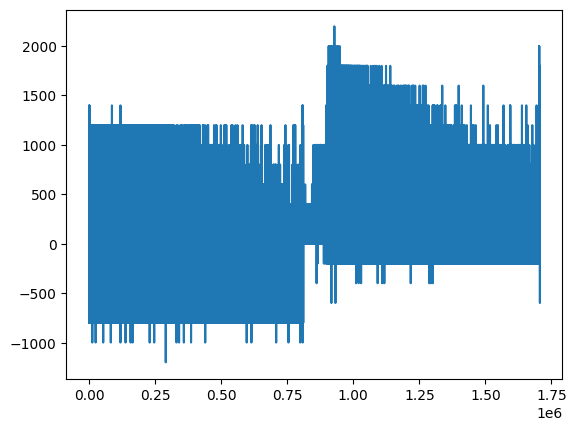

In [20]:
all_pats = patterns.sum(axis=1)
print(all_pats)
all_pats.plot()

## X paramiter for feeding Model

In [21]:
X = df.drop(['Sum'], axis=1)
X

,BuyQuoteVolume,CDL2CROWS,CDL3BLACKCROWS,CDL3INSIDE,CDL3LINESTRIKE,CDL3OUTSIDE,CDL3STARSINSOUTH,CDL3WHITESOLDIERS,CDLABANDONEDBABY,CDLADVANCEBLOCK,...,CDLUPSIDEGAP2CROWS,CDLXSIDEGAP3METHODS,Change,Close,High,Low,Open,Trades,VolumeBTC,VolumeBUSD
0,6.187260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.0001,19998.21,20002.69,19995.19,19998.23,441.0,9.474930,189483.099107
1,0.973320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.0001,19997.00,19998.00,19997.00,19997.02,173.0,2.829590,56583.426669
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.0001,9997.96,9998.65,9997.96,9997.97,5.0,0.219472,2194.416861
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.0001,9995.58,9995.60,9995.58,9995.59,4.0,0.329002,3288.567211
4,17.762630,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.0001,19987.74,19998.62,19985.14,19987.76,642.0,25.911260,518027.903052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1706333,0.921370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0001,30036.85,30036.85,30026.53,30036.82,94.0,1.743990,52377.270472
1706334,0.020623,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0001,10008.00,10008.00,10007.99,10007.99,3.0,0.020623,206.394904
1706335,0.008695,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0001,10006.00,10006.00,10005.99,10005.99,2.0,0.008695,87.002120
1706336,1.654020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0001,40020.06,40023.65,40020.02,40020.02,92.0,4.136800,165568.528356


## Y paramiter for feedind Model

In [22]:
y = df['Sum']
y

0            0.0
1            0.0
2            0.0
3            0.0
4            0.0
           ...  
1706333    400.0
1706334    200.0
1706335    200.0
1706336    500.0
1706337    100.0
Name: Sum, Length: 1706338, dtype: float64

## Model for AI Research

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

model = DecisionTreeClassifier()
# model=RandomForestClassifier()
model

DecisionTreeClassifier()

## Fit X and y data to model

In [24]:
# model.fit(X, y)

## Calculating the Accuracy
### Normally I take very small data for that but in real application we have to take very big dataset

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.1)

model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy_score(y_test, predictions)

0.9992439959210943

## Export Train model

In [26]:
import joblib
model = model.fit(X_train, y_train)
joblib.dump(model, "btcbusd_trand_predictor.joblib")

['btcbusd_trand_predictor.joblib']

## Directally Grab Fidable data from internet but it have to be superviged test data from database

## Make Prediction With Train Model

In [27]:
from dataframe import GetDataframe
symbol = "BTCBUSD"

df = GetDataframe().get_minute_data(symbol, 1, 5)
df = df.iloc[:,0:10]
df.astype(float)
# df = df.drop(columns=['symbol','VolumeBUSD', 'CloseTime'])
# df = df.iloc[0]
# print(df)
results = []
cols = []
for attr in dir(talib):
    if attr[:3]=='CDL':
#         print(getattr(talib, attr))
        res = getattr(talib, attr)(df['Open'], df['High'], df['Low'],
                                         df['Close'])
        results.append(res)
        cols.append(attr)
# print(results)
# print(cols)

patterns = pd.DataFrame(results).T
patterns.columns = cols
patterns.astype(float)
patterns["Sum"] = patterns.sum(axis=1)
patterns
df = df.add(patterns, fill_value=0)
df = df.drop(['CloseTime', 'Sum'], axis=1)
df = df.iloc[-2]
# print(df)
print(model.predict([df]))

[0.]


c:\users\user\pycharmprojects\tradingaidev\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [28]:
# print(df)

model = joblib.load("btcbusd_trand_predictor.joblib")
predictions = model.predict([df])
predictions

c:\users\user\pycharmprojects\tradingaidev\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0.])

## All Coulms need for creat a Visual Representation

In [102]:
feature_name = list(X.columns)

## Export model in dot visual language
class_names=sorted(y.unique()),

In [103]:
from sklearn import tree
model = DecisionTreeClassifier()
model.fit(X, y)
tree.export_graphviz(model, out_file='btc_busd_visual.dot',
                    feature_names=feature_name,
                     label='all',
                     rounded=True,
                     filled=True
                    )

## Use Tensorflow

In [104]:
import tensorflow as tf
model = tf.keras.models.Sequential()

In [112]:
model.add(tf.keras.layers.Dense(256, input_shape=X_train.shape, activation='sigmoid'))
model.add(tf.keras.layers.Dense(256, activation='sigmoid'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))


In [113]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [115]:
# model.fit(X_train, y_train, epochs=1000)

Epoch 1/1000


ValueError: in user code:

    File "C:\Users\user\PycharmProjects\TradingAiDevlopment\venv\lib\site-packages\keras\engine\training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\user\PycharmProjects\TradingAiDevlopment\venv\lib\site-packages\keras\engine\training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\user\PycharmProjects\TradingAiDevlopment\venv\lib\site-packages\keras\engine\training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\user\PycharmProjects\TradingAiDevlopment\venv\lib\site-packages\keras\engine\training.py", line 1023, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\user\PycharmProjects\TradingAiDevlopment\venv\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\user\PycharmProjects\TradingAiDevlopment\venv\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_3" is incompatible with the layer: expected shape=(None, 1526662, 70), found shape=(None, 70)
